In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from mlxtend.data import loadlocal_mnist

In [2]:
def process_mnist_data() -> (np.ndarray, np.ndarray, np.ndarray, np.ndarray):
    mnist_path = './MNIST/'
    train_images, train_labels = loadlocal_mnist(
        images_path = mnist_path + './train-images.idx3-ubyte',
        labels_path = mnist_path + './train-labels.idx1-ubyte'
    )
    test_images, test_labels = loadlocal_mnist(
        images_path = mnist_path + './t10k-images.idx3-ubyte',
        labels_path = mnist_path + './t10k-labels.idx1-ubyte'
    )
    return train_images, train_labels, test_images, test_labels

In [3]:
def unpickle(file):
    with open(file, 'rb') as fo:
        data_dict = pickle.load(fo, encoding='bytes')
    return data_dict

In [4]:
def process_cifar_dataset() -> (np.ndarray, np.ndarray, np.ndarray, np.ndarray):
    cifar_path = './cifar-10-python/cifar-10-batches-py'
    data_batch = unpickle(cifar_path + '/data_batch_1')
    train_images, train_labels = data_batch[b'data'], np.array(data_batch[b'labels'])
    for i in range(2,6):
        data_batch = unpickle(cifar_path + '/data_batch_' + str(i))
        train_images = np.concatenate((train_images, data_batch[b'data']), axis=0)
        train_labels = np.concatenate((train_labels, np.array(data_batch[b'labels'])), axis=0)
    test_batch = unpickle(cifar_path + '/test_batch')
    test_images, test_labels = test_batch[b'data'], np.array(test_batch[b'labels'])
    return train_images, train_labels, test_images, test_labels

In [5]:
def process_toy_dataset():
    toy_dataset_path = './Toy Dataset/'

In [6]:
def relu(matrix:np.ndarray) -> np.ndarray:
    return matrix * (matrix > 0)

In [7]:
class ConvolutionLayer:
    def __init__(self, output_channel_count: int, filter_dimension: int, stride: int, padding: int):
        self.output_channel_count = output_channel_count
        self.filter_dimension = filter_dimension
        self.stride = stride
        self.padding = padding

    def forward(self, input_image: np.ndarray) -> np.ndarray:
        input_dimentions = input_image.shape[0]
        output_dimentions = (input_dimentions - self.filter_dimension + 2 * self.padding) // self.stride + 1
        input_shape = input_image.shape

        filters = np.random.rand(
            self.output_channel_count,
            self.filter_dimension,
            self.filter_dimension,
            input_shape[2]
        )

        bias = np.random.rand(self.output_channel_count)

        # Pad the image
        padded_image = np.zeros((
            input_shape[0]+ 2*self.padding,
            input_shape[1]+ 2*self.padding,
            input_shape[2]
        ))

        # Padding variables
        x_min = self.padding
        x_max = x_min + input_shape[0]
        y_min = self.padding
        y_max = y_min + input_shape[1]

        padded_image[x_min:x_max, y_min:y_max, :] = input_image
        padded_image /= 255.0
        padded_dimensions = padded_image.shape

        output = np.zeros((output_dimentions, output_dimentions, self.output_channel_count))

        for i in range(self.output_channel_count):
            image_y = out_y = 0
            while image_y + self.filter_dimension <= padded_dimensions[1]:
                image_x = out_x = 0
                while image_x + self.filter_dimension <= padded_dimensions[0]:
                    image_slice = padded_image[image_x:image_x+self.filter_dimension, image_y:image_y+self.filter_dimension, :]
                    output[out_x, out_y, i] = np.sum(image_slice * filters[i, :, :, :]) + bias[i]
                    image_x += self.stride
                    out_x += 1
                image_y += self.stride
                out_y += 1

        return output

    def backward(self):
        pass

In [8]:
class ActivationLayer:
    def __init__(self):
        pass

    def forward(self, input_matrix: np.ndarray) -> np.ndarray:
        return relu(input_matrix)

    def backward(self):
        pass

In [9]:
class MaxPoolingLayer:
    def __init__(self, filter_dimension: int, stride: int):
        self.filter_dimension = filter_dimension
        self.stride = stride

    def forward(self, image: np.ndarray) -> np.ndarray:
        input_dimensions = image.shape

        output_dimension = (input_dimensions[0] - self.filter_dimension) // self.stride + 1

        output = np.zeros((output_dimension, output_dimension, input_dimensions[2]))

        image_y = out_y = 0
        while image_y + self.filter_dimension <= input_dimensions[1]:
            image_x = out_x = 0
            while image_x + self.filter_dimension <= input_dimensions[0]:
                image_slice = image[image_x: image_x+self.filter_dimension, image_y: image_y+self.filter_dimension, :]
                output[out_x, out_y, :] = np.max(image_slice, axis=(0, 1))
                image_x += self.stride
                out_x += 1
            image_y += self.stride
            out_y += 1

        return output

    def backward(self):
        pass

In [10]:
class FullyConnectedLayer:
    pass

In [11]:
class FlatteningLayer:
    pass

In [12]:
class SoftmaxLayer:
    pass

(28, 28, 10)


array([[0.01692755, 0.01692755, 0.01692755, 0.01692755, 0.01692755,
        0.01692755, 0.01692755, 0.01692755, 0.01692755, 0.01692755,
        0.01692755, 0.01692755, 0.01692755, 0.01692755, 0.01692755,
        0.01692755, 0.01692755, 0.01692755, 0.01692755, 0.01692755,
        0.01692755, 0.01692755, 0.01692755, 0.01692755, 0.01692755,
        0.01692755, 0.01692755, 0.01692755],
       [0.01692755, 0.01692755, 0.01692755, 0.01692755, 0.01692755,
        0.01692755, 0.01692755, 0.01692755, 0.01692755, 0.01692755,
        0.01692755, 0.01692755, 0.01692755, 0.01692755, 0.01692755,
        0.01692755, 0.01692755, 0.01692755, 0.01692755, 0.01692755,
        0.01692755, 0.01692755, 0.01692755, 0.01692755, 0.01692755,
        0.01692755, 0.01692755, 0.01692755],
       [0.01692755, 0.01692755, 0.01692755, 0.01692755, 0.01692755,
        0.01692755, 0.01692755, 0.01692755, 0.01692755, 0.01692755,
        0.01692755, 0.01692755, 0.01692755, 0.01692755, 0.01692755,
        0.01692755, 0.0169

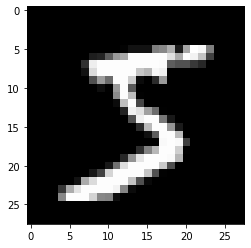

In [13]:
x_train, y_train, x_test, y_test = process_mnist_data()
c = ConvolutionLayer(10, 3, 1, 1)
img = x_train[0].reshape(28, 28, 1)
plt.imshow(img, cmap='gray')
o = c.forward(img)
print(o.shape)
o [:, :, 0]

In [14]:
m = MaxPoolingLayer(2, 2)
o1 = m.forward(o)
o1[:, :, 0]

array([[0.01692755, 0.01692755, 0.01692755, 0.01692755, 0.01692755,
        0.01692755, 0.01692755, 0.01692755, 0.01692755, 0.01692755,
        0.01692755, 0.01692755, 0.01692755, 0.01692755],
       [0.01692755, 0.01692755, 0.01692755, 0.01692755, 0.01692755,
        0.01692755, 0.01692755, 0.01692755, 0.01692755, 0.01692755,
        0.01692755, 0.01692755, 0.01692755, 0.01692755],
       [0.01692755, 0.01692755, 0.01692755, 0.04931727, 0.28695727,
        0.82722345, 1.4215041 , 1.71044948, 2.06833906, 1.98458466,
        2.39402288, 2.05292346, 0.37098785, 0.01692755],
       [0.01692755, 0.01692755, 0.01692755, 0.5971808 , 2.68543085,
        3.29987338, 3.74140649, 3.74260982, 3.72294551, 2.52579723,
        2.55731601, 2.16298777, 0.26093969, 0.01692755],
       [0.01692755, 0.01692755, 0.01692755, 0.73536721, 3.04432676,
        3.54195249, 3.89715889, 2.78006519, 2.59640895, 1.30845083,
        0.44695471, 0.21234643, 0.01692755, 0.01692755],
       [0.01692755, 0.01692755, 0.0

(32, 32, 10)


array([[1.66983951, 1.88973346, 1.9103344 , ..., 4.82934025, 4.73217909,
        3.2601653 ],
       [1.38641036, 1.86654922, 2.08852888, ..., 5.35144075, 5.20672197,
        3.60095899],
       [1.32193353, 1.90836062, 2.3774391 , ..., 4.92101127, 4.64015056,
        3.21813599],
       ...,
       [4.87147116, 6.94638904, 6.40814856, ..., 5.18324266, 4.30523529,
        2.21477081],
       [4.82657438, 7.07920903, 6.77957322, ..., 6.17528342, 5.59704004,
        3.13977865],
       [3.25044307, 4.46995758, 4.37842726, ..., 4.26020615, 3.99650265,
        2.26475485]])

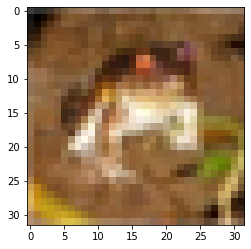

In [15]:
x_train, y_train, x_test, y_test = process_cifar_dataset()
c = ConvolutionLayer(10, 3, 1, 1)
img = x_train[0].reshape(3, 32, 32)
img = img.transpose(1, 2, 0)
plt.imshow(img)
o = c.forward(img)
print(o.shape)
o[:, :, 0]

In [16]:
o1 = m.forward(o)
o1[:, :, 0]

array([[ 1.88973346,  2.96248831,  4.71648781,  5.09870946,  4.97518921,
         4.68345391,  4.76521449,  4.94363777,  4.89385124,  4.91451698,
         5.24815697,  5.17083951,  5.35510503,  5.69071716,  5.59009704,
         5.20672197],
       [ 2.52523564,  3.88409368,  4.4624093 ,  4.58464571,  4.62077944,
         4.59210201,  4.70010308,  4.90299493,  4.64576783,  4.80335678,
         5.33813102,  5.34992593,  5.05110799,  5.18975411,  5.0919464 ,
         4.64015056],
       [ 3.77166451,  4.63502247,  4.75914684,  4.51564768,  4.65067061,
         4.54718094,  4.39374504,  4.41559174,  4.12570376,  4.44023521,
         4.77229279,  5.22582034,  5.40361072,  4.79287348,  3.94783458,
         2.94760927],
       [ 4.78901139,  4.94906841,  4.89252811,  4.79160275,  4.93699635,
         4.68013681,  3.5709969 ,  3.65469791,  5.58955671,  4.76465181,
         3.88764272,  4.92362805,  5.3782151 ,  5.10912204,  4.44738646,
         4.43957728],
       [ 6.13915702,  5.81508809,  5